In [1]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

import gym
from gym.spaces import Discrete
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.policy_gradient_with_baseline_agent import PolicyGradientWithBaselineAgent
from source.utils import utils
from tqdm import tqdm
import torch
import random

/Users/tonywy/micromamba/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


using device: cpu
policy_gradient_agent_test passed!


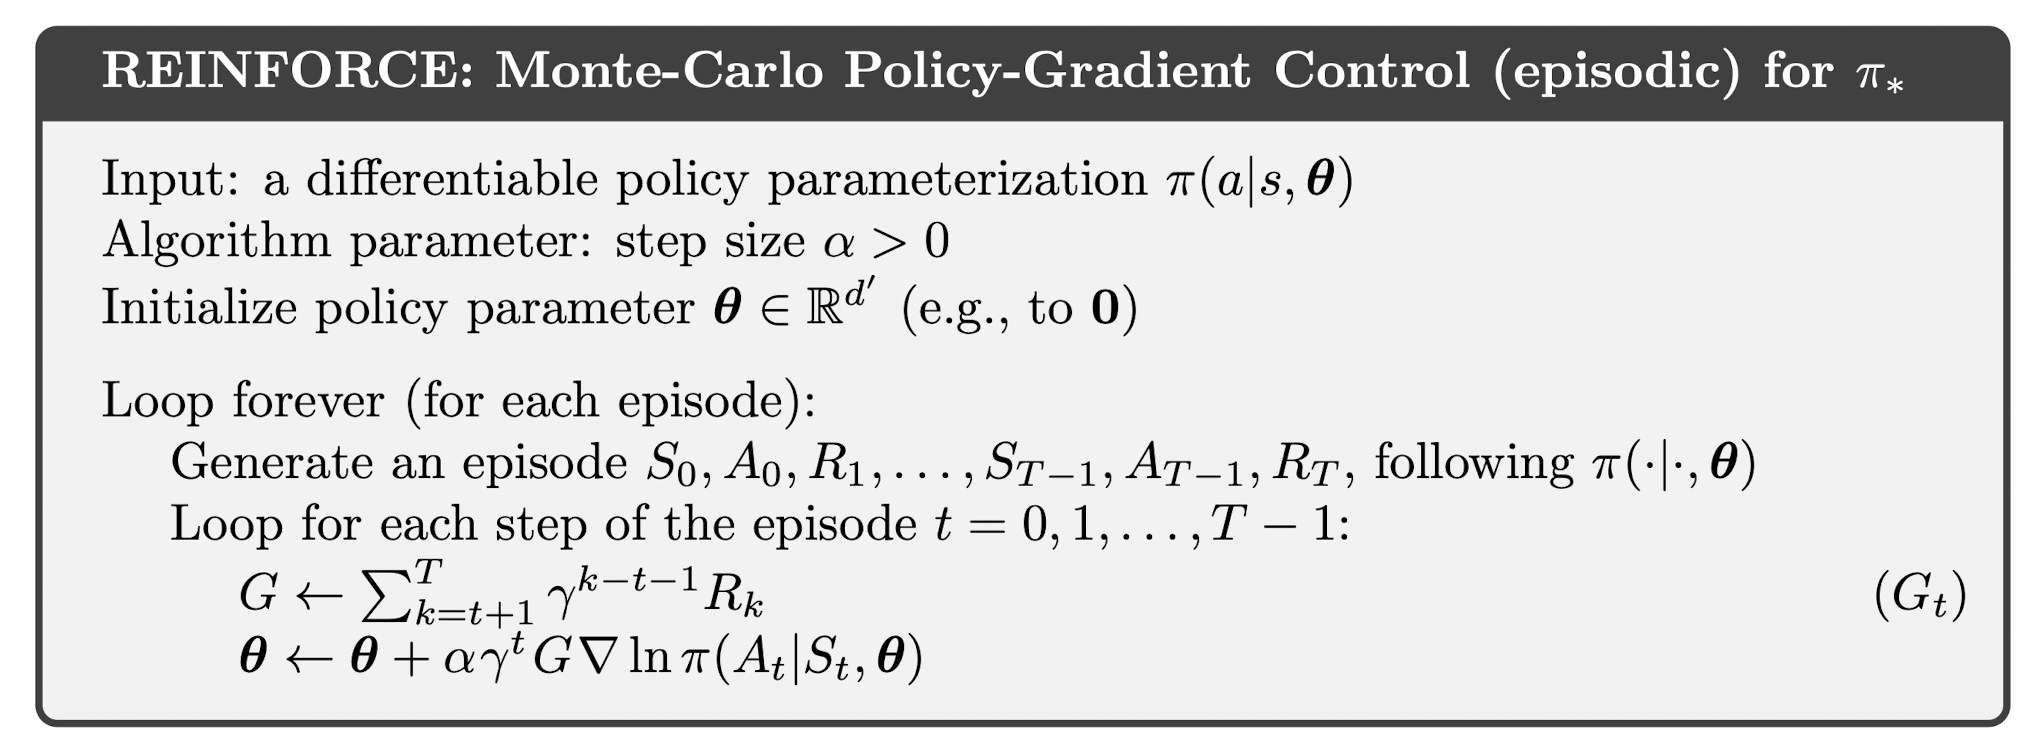

using device: cpu


100%|██████████| 100/100 [00:00<00:00, 103.08it/s]


step: 0, average_return: 23.73469387755102, success rate: 1.0


100%|██████████| 100/100 [00:01<00:00, 52.78it/s]


step: 1, average_return: 50.11224489795919, success rate: 1.0


100%|██████████| 100/100 [00:06<00:00, 14.48it/s]


step: 2, average_return: 193.29591836734693, success rate: 1.0


100%|██████████| 100/100 [00:16<00:00,  5.97it/s]


step: 3, average_return: 448.7755102040816, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.32it/s]


step: 4, average_return: 485.5612244897959, success rate: 1.0


100%|██████████| 100/100 [00:19<00:00,  5.19it/s]


step: 5, average_return: 497.0816326530612, success rate: 1.0


100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


step: 6, average_return: 494.7244897959184, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.27it/s]


step: 7, average_return: 493.3775510204082, success rate: 1.0


100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


step: 8, average_return: 500.0, success rate: 1.0


100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


step: 9, average_return: 497.51020408163265, success rate: 1.0


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


step: 10, average_return: 497.3673469387755, success rate: 1.0


100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


step: 11, average_return: 499.8673469387755, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.32it/s]


step: 12, average_return: 498.2551020408163, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.52it/s]


step: 13, average_return: 491.734693877551, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.55it/s]


step: 14, average_return: 490.1530612244898, success rate: 1.0


100%|██████████| 100/100 [00:17<00:00,  5.59it/s]


step: 15, average_return: 492.5816326530612, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.50it/s]


step: 16, average_return: 496.5408163265306, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.52it/s]


step: 17, average_return: 495.11224489795916, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.51it/s]


step: 18, average_return: 496.5204081632653, success rate: 1.0


100%|██████████| 100/100 [00:18<00:00,  5.53it/s]


step: 19, average_return: 496.9795918367347, success rate: 1.0

rewarding episodes: 863981.0


100%|██████████| 100/100 [00:18<00:00,  5.50it/s]


Average return = 494.78, Success rate = 0.0


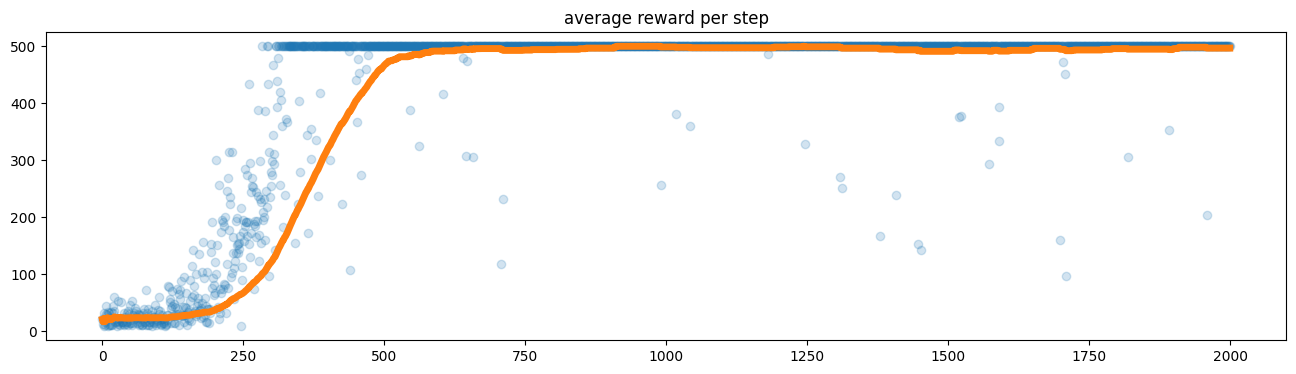

In [2]:
# Policy Eval
# Params
num_epoch = 20
num_episode = 100
video_path = os.path.join(ROOT, "video/reinforce_with_baseline.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
# set random seeds
rng = np.random.default_rng(random_seed)
#random.seed(random_seed)
np.random.seed(random_seed)
#torch.manual_seed(random_seed)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
#env = gym.make(
#    "LunarLander-v2",
#    render_mode='rgb_array'
#)
env = gym.make("CartPole-v1", render_mode='rgb_array')
#env = gym.make("CarRacing-v2", render_mode='rgb_array', continuous=False)
env.np_random = rng

# Create Agent
agent = PolicyGradientWithBaselineAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.99,
    epsilon=None, # use epsilon_schedule
    learning_rate=None,
    policy_lr=1e-3,
    value_lr=1e-3,
    net_params={'width':32, 'n_hidden':1}
)
# Start Learning
for i in range(num_epoch):
    success = 0
    for _ in tqdm(range(num_episode)):
        reward, steps = agent.play_episode(env)
        if reward > 0:
            success += 1
        history.append(reward)
        total_reward += reward
    print(
        f"step: {i}, average_return: {np.mean(history[-num_episode+1:-1])}, success rate: {success / num_episode}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learning only: get greedy policy (no exploration)
#agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q.weight)
# Run Eval
avarge_return, success_rate = utils.evaluate_agent(agent, env, num_episode=100, threshold=500)
print(f"Average return = {avarge_return}, Success rate = {success_rate}")

# play last episode with video recording

utils.plot_history(history)


In [3]:

reward, _ = agent.play_episode(env, video_path=video_path, epsilon=0)
print(reward)
html=utils.render_mp4(video_path)
HTML(html)


Moviepy - Building video ../../video/reinforce_with_baseline.mp4.
Moviepy - Writing video ../../video/reinforce_with_baseline.mp4



Moviepy - Done !
Moviepy - video ready ../../video/reinforce_with_baseline.mp4
500.0
